# 1. Title: Market Basket Analysis of E- Commerce Dataset

### Introduction:

This project focuses on conducting a comprehensive analysis of the an E-commerce dataset to extract valuable insights into customer purchasing behavior. The primary objectives encompass uncovering patterns in product associations and deriving actionable insights to optimize sales and customer satisfaction for the retail company.

#### Problem Statement:

The aims is to understand the relationships between products frequently purchased together by customers. The goal is to leverage these associations to make informed business decisions and enhance overall performance.

#### Objectives of the Analysis:

1. Explore the dataset to identify patterns and associations in customer purchasing behavior.
2. Conduct market basket analysis to reveal frequent product combinations.
3. Provide actionable insights for the retail company to optimize sales strategies and enhance customer satisfaction.
   
#### Background Information:

The dataset provided contains transactional records capturing Member ID, purchase dates, and item descriptions. By leveraging this dataset, the analysis aims to uncover valuable insights that will aid in making data-driven decisions for the retail business.


 ## 2. Import necessary libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx


# 3. Loading the Market Basket dataset.

In [2]:
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv') #Loading the dataset

df.head() # Display the DataFrame

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#  4. Data Preparation

In [3]:
#Exploring the structure of the dataset
print(df.info())

# Convertingthe 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Checking for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None
Member_number      0
Date               0
itemDescription    0
dtype: int64


# 5. Exploratory Data Analysis (EDA) 

In [4]:
# Basic statistics
print(df.describe())


       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000


In [8]:
#Number of unique items
print("There are", df['itemDescription'].nunique(), "unique items in this data")

There are 167 unique items in this data


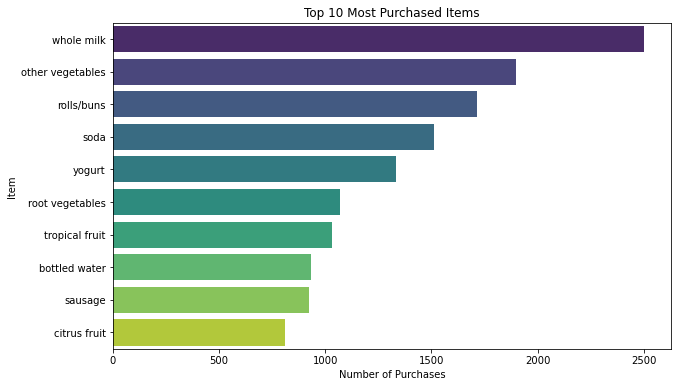

In [9]:
# Exploring the top N items, to know items that are bought the most 
top_items = df['itemDescription'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item')
plt.show()

 **This shows the distribution of the top 10 items that is most purchased and their corresponding purchase counts. 
 Whole milk is the most purchased item followed by other vegetable and then roll buns.**

In [10]:
top10 = df["itemDescription"].value_counts().head()
top10

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: itemDescription, dtype: int64

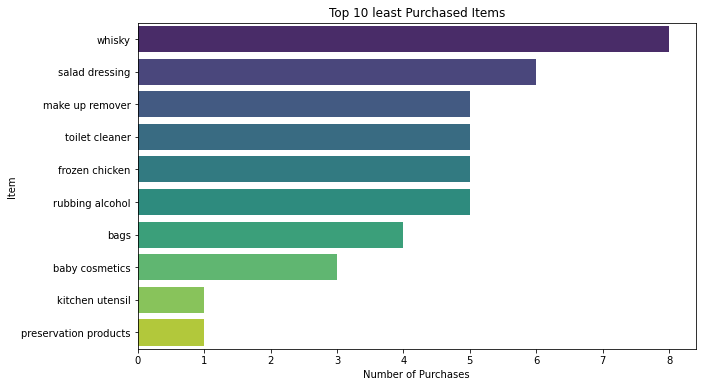

In [7]:
# Exploring the base N items, to know items that are bought the least.

top_items = df['itemDescription'].value_counts().tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 least Purchased Items')
plt.xlabel('Number of Purchases')
plt.ylabel('Item')
plt.show()

**The least purchased items are preservation products, kitchen utensils and baby cosmetics**

In [12]:
least10 = df["itemDescription"].value_counts().tail()
least10

rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

In [9]:
# Exploring the number of unique members/ customers that has visited the store.
print("Number of unique customers:", df['Member_number'].nunique())

Number of unique customers: 3898


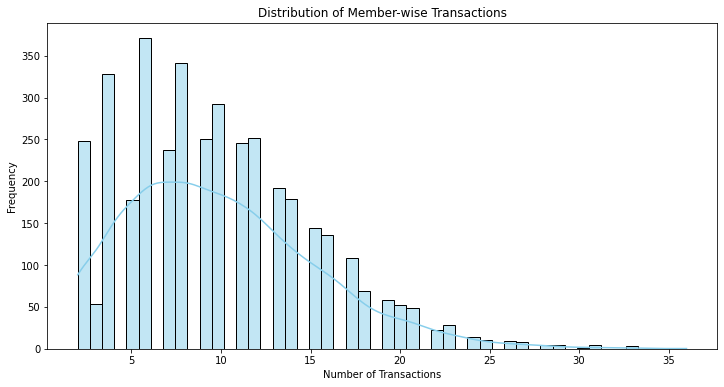

In [13]:
# Member-wise transaction count to know the amount of transaction carried out by each customer
member_transaction_count = df.groupby('Member_number').size()

# Visualizing the member-wise transactions using histogram
plt.figure(figsize=(12, 6))
sns.histplot(member_transaction_count, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Member-wise Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

**A larger number of members make  few purchases while we have very few heavy purchasers among them.The category of members who shopped 5 times ranged from 175-370 member, while the heaviest shoppers who have shopped for more than 35 times are less than 10.**

### Extracting 'Year','Month','Day', and 'Weekday' from the DataFrame to be used for further analysis.

In [14]:
# Extracting time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # Monday=0, Sunday=6

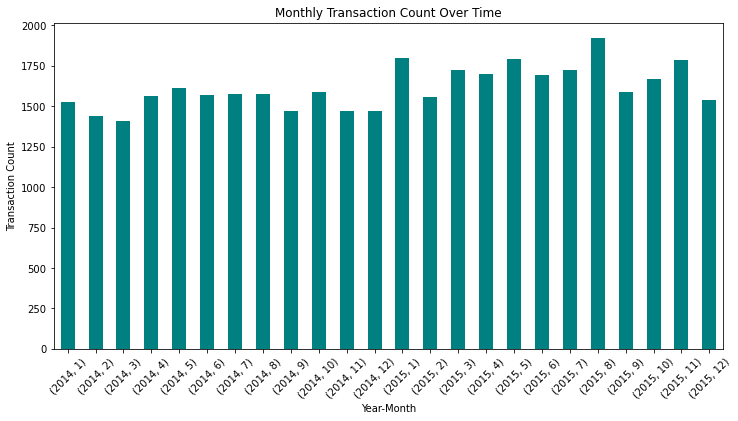

In [15]:
# Exploring the Monthly number of transactions.
monthly_transaction_count = df.groupby(['Year', 'Month']).size()

# Visualize the trend of transactions over time
plt.figure(figsize=(12, 6))
monthly_transaction_count.plot(kind='bar', color='teal')
plt.title('Monthly Transaction Count Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


**The highest sales transaction occurred in August 2015, followed by January 2015.**

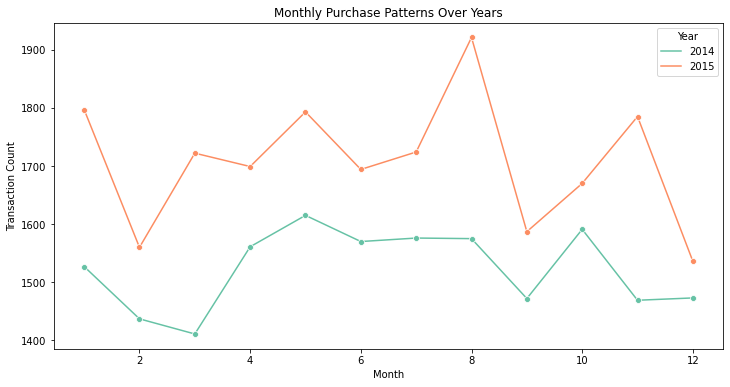

In [13]:
# Monthly transaction count
monthly_transaction_count = df.groupby(['Year', 'Month']).size().reset_index(name='Transaction_Count')

# Visualize monthly purchase patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_transaction_count, x='Month', y='Transaction_Count', hue='Year', marker='o', palette='Set2')
plt.title('Monthly Purchase Patterns Over Years')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.legend(title='Year')
plt.show()


**In the year 2014,the month with the highest purchase was MAY, while in the Year 2015, August is the month with the highest purchase count.**

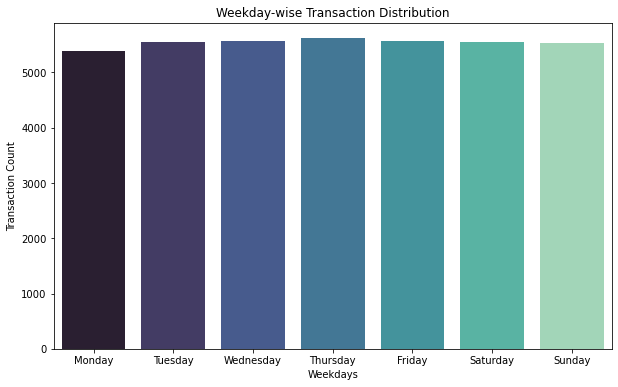

In [16]:
# Weekday-wise transaction count
weekday_transaction_count = df.groupby('Weekday').size()

# Map weekdays for better visualization
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_transaction_count.index = weekday_transaction_count.index.map(weekday_map)

# Visualize weekday-wise transactions
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_transaction_count.index, y=weekday_transaction_count.values, palette='mako')
plt.title('Weekday-wise Transaction Distribution')
plt.xlabel('Weekdays')
plt.ylabel('Transaction Count')
plt.show()

**All through through the years(2014 and 2015), Thursday has the highest number of transactions.**

In [17]:
df.head(10)

,Member_number,Date,itemDescription,Year,Month,Day,Weekday
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-01-05,whole milk,2015,1,5,0
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-02-01,whole milk,2015,2,1,6
5,4941,2015-02-14,rolls/buns,2015,2,14,5
6,4501,2015-05-08,other vegetables,2015,5,8,4
7,3803,2015-12-23,pot plants,2015,12,23,2
8,2762,2015-03-20,whole milk,2015,3,20,4
9,4119,2015-02-12,tropical fruit,2015,2,12,3


# 6. Market Basket Analysis

#### Preparing Data for Association Rule Mining

In [21]:
# Creating a unique identifier 'single_transaction' by combining 'Member_number' and 'Date'

df['single_transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str) #  deriving a uique transactions

# Display thefirst five on the data frame 
df.head()


,Member_number,Date,itemDescription,Year,Month,Day,Weekday,single_transaction
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1808_2015-07-21
1,2552,2015-01-05,whole milk,2015,1,5,0,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2015,9,19,5,2300_2015-09-19
3,1187,2015-12-12,other vegetables,2015,12,12,5,1187_2015-12-12
4,3037,2015-02-01,whole milk,2015,2,1,6,3037_2015-02-01


In [22]:
# Creating a cross-tabulation between 'single_transaction' and 'itemDescription'
# This is to create a summary of how many times each item has been purchased in each unique transaction.
df2 = pd.crosstab(df['single_transaction'], df['itemDescription'])

# Display the first few rows 
df2.head()


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Converting transactions into a format suitable for Apriori algorithm
basket = df[['Member_number', 'Date', 'itemDescription']]  # Subset relevant columns
basket['Date'] = pd.to_datetime(basket['Date'])  # Convert 'Date' column to datetime format
basket['Transaction_ID'] = basket.groupby('Member_number').cumcount() + 1  # Create a transaction ID

# Pivoting table to create transactional data suitable for Apriori algorithm
basket = basket.pivot_table(index=['Member_number', 'Transaction_ID'], columns='itemDescription', 
                            aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0)

# Display the first few rows of the transaction data
print(basket.head())


C:\Users\HAFEEZ~1\AppData\Local\Temp/ipykernel_2196/594718243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket['Date'] = pd.to_datetime(basket['Date'])  # Convert 'Date' column to datetime format
C:\Users\HAFEEZ~1\AppData\Local\Temp/ipykernel_2196/594718243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket['Transaction_ID'] = basket.groupby('Member_number').cumcount() + 1  # Create a transaction ID


                                              Date                            \
itemDescription              Instant food products UHT-milk abrasive cleaner   
Member_number Transaction_ID                                                   
1000          1                                  0        0                0   
              2                                  0        0                0   
              3                                  0        0                0   
              4                                  0        0                0   
              5                                  0        0                0   

                                                                   \
itemDescription              artif. sweetener baby cosmetics bags   
Member_number Transaction_ID                                        
1000          1                             0              0    0   
              2                             0              0    0   
              

In [25]:
# Defining a function to encode item frequencies for Apriori algorithm
def encode(item_freq):
    """
    Encode item frequencies for Apriori algorithm.
    
    Parameters:
        item_freq (int): The frequency of an item in a transaction.
    
    Returns:
        int: Binary encoding (1 if frequency > 0, 0 otherwise).
    """
    # Initializing the result as 0
    res = 0
    # Set to 1 if the item is present in the transaction
    if item_freq > 0:
        res = 1
    return res

# Apply the encoding function to each entry in the DataFrame
basket_input = df2.applymap(encode)


#### Applying Apriori Algorithm

In [26]:
# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_input, min_support=0.01, use_colnames=True)

# Generating association rules based on frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift")

# Displaying the first few rows
rules.head()


C:\Users\HAFEEZAH SANUSI IGE\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


In [30]:
# Sorting the generated association rules by support, confidence, and lift in descending order
sorted_rules = rules.sort_values(["support", "confidence", "lift"], axis=0, ascending=False)

# This displays the top rules based on support, confidence, and lift
sorted_rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
1,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508


**Customers who buy "whole milk" are likely to buy "rolls/buns," and vice versa. 
This shows that the association is stronger than random chance.
Also,
There is an association between buying "whole milk" and buying "yogurt." 
This association is also stronger than random chance.**


# 7. Visualizations

 ###### Analyzing and Visualizing Association Rules

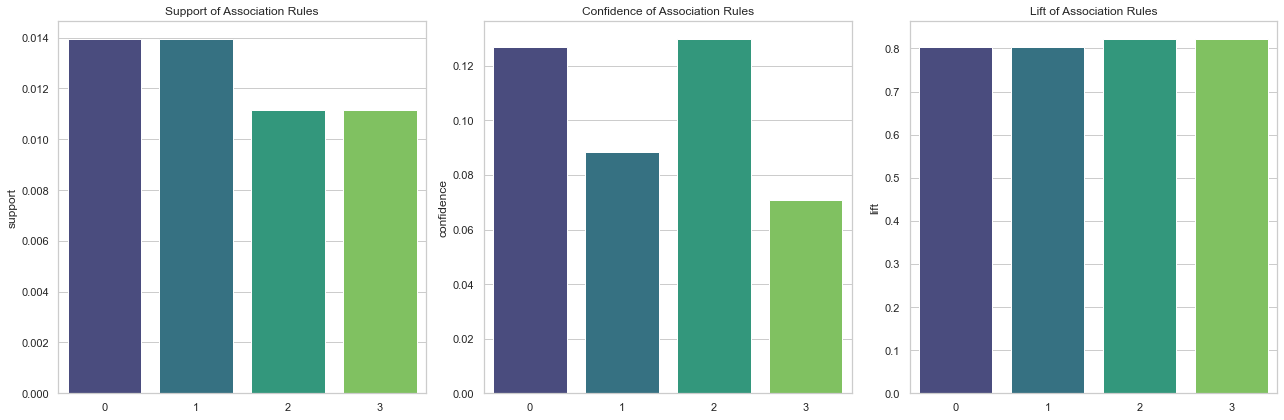

In [34]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plotting the Support, Confidence, and Lift of the association rules
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Support
sns.barplot(x=rules.index, y=rules['support'], ax=axes[0], palette="viridis")
axes[0].set_title('Support of Association Rules')

# Confidence
sns.barplot(x=rules.index, y=rules['confidence'], ax=axes[1], palette="viridis")
axes[1].set_title('Confidence of Association Rules')

# Lift
sns.barplot(x=rules.index, y=rules['lift'], ax=axes[2], palette="viridis")
axes[2].set_title('Lift of Association Rules')

plt.tight_layout()
plt.show()


**These plots provide insights into the relationships between items in transactions. For example, a high confidence and lift value between 'rolls/buns' and 'whole milk' indicate a strong association, suggesting that customers often buy these items together.**

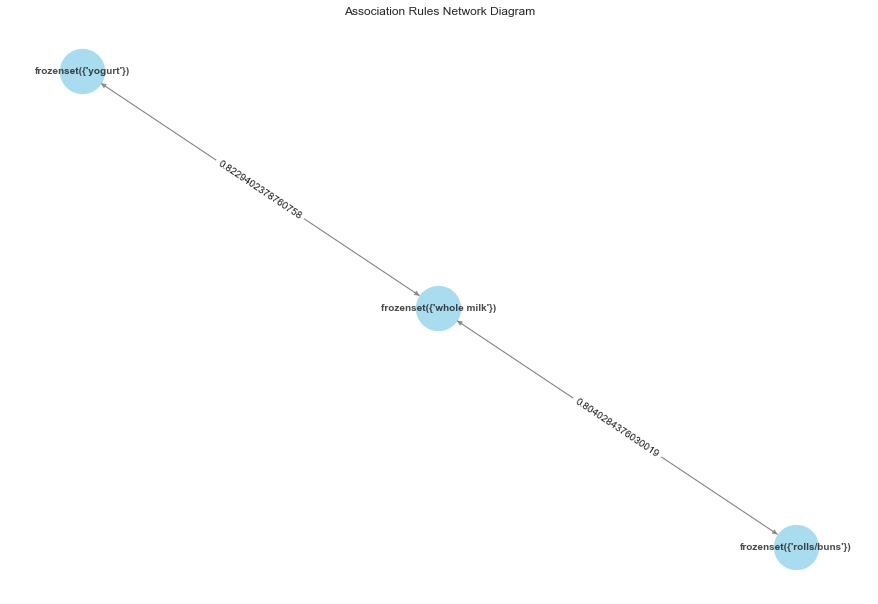

In [27]:
# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes to the graph
for idx, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# Define positions for nodes in the graph
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, font_size=10, font_color="black", font_weight="bold", node_size=2000, node_color="skyblue", edge_color="gray", linewidths=0.5, alpha=0.7)

# Add labels for edges
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Association Rules Network Diagram")
plt.show()


**This means that the purchase of 'yogurt' is associated with the purchase of 'whole milk', which, in turn, is associated with the purchase of 'rolls/buns'.**

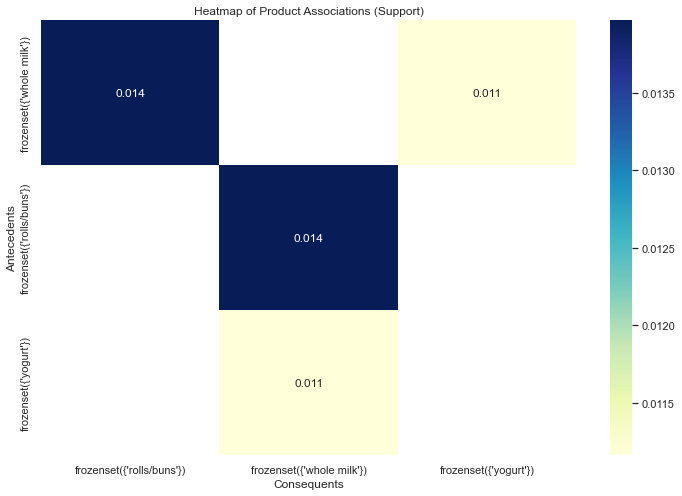

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the rules DataFrame for a heatmap
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='support')

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Heatmap of Product Associations (Support)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


# 8. Insights


**Based on the analysis and visualizations of the market basket data, several insights can be derived:

1. *Top Associated Products:*
The bar charts and network diagram reveal the top associated products based on support, confidence, and lift. For example, "rolls/buns" and "whole milk" are frequently bought together.
2. Association Rules Heatmap:
The heatmap provides a comprehensive view of support values for different product combinations. Darker cells indicate stronger associations,Showing that "rolls/buns" and "whole milk" are frequently bought together and has strong association
3. Sequence of Purchases:
Identification of sequential purchasing patterns from the graph has shown that from the association 'yogurt' --> 'whole milk' --> 'rolls/buns', it's observed that customers who buy 'yogurt' tend to buy 'whole milk', followed by 'rolls/buns'. This sequence might suggest common purchasing behavior or potential product combinations.

# 9. Recommendations

**Based on the insights derived from the provided dataset, here are specific recommendations for the E-commerce company. The Utilization of these insights for marketing strategies, shelf placement, product bundling, or targeted promotions. For instance, based on the association rules, promoting 'rolls/buns' to customers purchasing 'yogurt' and 'whole milk' might enhance sales or cross-selling opportunities.
Place "rolls/buns" and "whole milk" in close proximity within the store, as they are frequently purchased together. Consider creating a designated section for common product pairs to optimize customer convenience. Others include:**

1. Strategic Product Placement:
During the holiday season (e.g., December), launch promotions for products like "bags and baby makeup" to capitalize on the identified seasonal trend and increase sales during festive periods.
2. Cross-Selling Opportunities:
Implement cross-selling strategies by offering promotions or discounts for purchasing combinations like "whole milk" and "rolls/buns." Leverage the strong associations to drive additional sales.
3. Targeted Marketing Campaigns:
Design targeted marketing campaigns that showcase popular product combinations identified in the analysis. Utilize advertising channels to promote associated products together and attract customer attention.
4. Customer Segmentation:
Explore customer segmentation based on purchasing behavior. Identify different customer groups, such as those who prefer seasonal items or specific product combinations, and tailor marketing strategies accordingly.